Dataset Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


## **Credit Card Fraud Detection Using Machine Learning & Python**

This dataset contains the real bank transactions made by European cardholders in the year 2013. As a security concern, the actual variables are not being shared but — they have been transformed versions of PCA. As a result, we can find 29 feature columns and 1 final class column.

PCA (Principal Component Analysis) is a statistical technique used for dimensionality reduction of large datasets. The main objective of PCA is to reduce the number of variables (or features) while retaining most of the information present in the dataset.

PCA achieves this by creating a new set of variables called principal components, which are linear combinations of the original variables. These principal components are ordered in terms of their contribution to the variation in the data, with the first component explaining the most variation and each subsequent component explaining less and less variation.

The steps involved in performing PCA are:

Standardize the data: PCA is sensitive to the scale of the variables, so it is necessary to standardize the data by subtracting the mean and dividing by the standard deviation.

Compute the covariance matrix: The covariance matrix describes the relationship between the variables. It is calculated by multiplying the transpose of the data matrix with the data matrix.

Compute the eigenvectors and eigenvalues of the covariance matrix: The eigenvectors are the directions in which the data varies the most, and the eigenvalues represent the magnitude of the variation in each eigenvector.

Select the principal components: The principal components are selected based on the eigenvalues. Typically, the first few principal components that explain a large percentage of the variance in the data are retained, while the rest are discarded.

Transform the data: The data is transformed by multiplying the standardized data matrix with the matrix of selected principal components.

PCA is a powerful tool for reducing the dimensionality of large datasets and visualizing high-dimensional data. It is widely used in various fields such as finance, engineering, biology, and social sciences.

The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

**Main challenges involved in credit card fraud detection are:**

--Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.

--Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones

--Data availability as the data is mostly private.

--Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.

--Adaptive techniques used against the model by the scammers.

**How to tackle these challenges?**

--The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.

--Imbalance can be dealt with by properly using some methods which we will talk about in the next paragraph

--For protecting the privacy of the user the dimensionality of the data can be reduced.

--A more trustworthy source must be taken which double-check the data, at least for training the model.

--We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.

## **Importing Dependencies**

In [157]:

import pandas as pd

In [158]:
data = pd.read_csv('/content/credit_data.csv')

In [159]:
pd.options.display.max_columns = None

The line pd.options.display.max_columns = None is used to set the maximum number of columns to display in a pandas DataFrame to None, which means that all columns will be displayed.

By default, pandas will only display a subset of the columns in a DataFrame if there are too many to fit within the available width of the output window. This can be inconvenient if you need to view all of the columns in the DataFrame.

# 1. Display Top 5 Rows of The Dataset

In [160]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **2. Check Last 5 Rows of The Dataset**

In [161]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Observations:

As you can see, the column names of the dataset seem strange. To protect the user’s identity and the security of their confidential information, the dataset provider has applied PCA transformation on the original numerical features and compressed it into 28 principal components. Only two features have not been anonymized i.e. Time and Amount. The feature Class is the target column with user labels as 0 - non-fraudulent and 1 - fraudulent.

## **3. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [162]:
data.shape

(284807, 31)

In [163]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


## **Let’s check the transaction distribution.**

In [164]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


Only 0.17% of transactions are fraudulent.

<AxesSubplot:xlabel='Class', ylabel='count'>

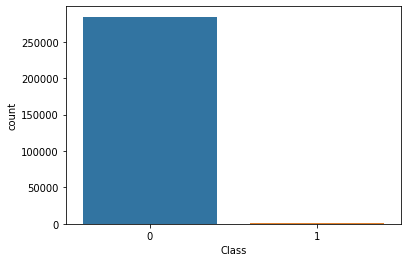

In [165]:
import seaborn as sns
sns.countplot(x='Class', data=data)

As we can see from this countplot, the classes 0 & 1 are highly imbalanced. Since most of the features are in PCA form except for  Time and Amount, we will have to take a deeper look into these features. 




Let us try to visualize the count of transactions over hours. We will first do it for the entire dataset and then split it between fraudulent users and non-fraudulent users-

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


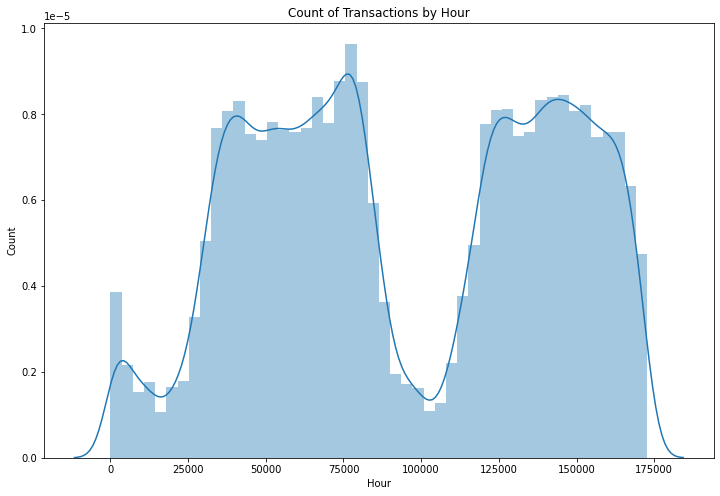

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(data['Time'], bins=48)
plt.title('Count of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


In [167]:
normal_df = (data[data.Class == 0])
fraudulent_df = (data[data.Class == 1])

In [168]:
print(normal_df)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.09079

In [169]:
print(fraudulent_df)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

## **Ploting Distplot for Normal Dataset**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


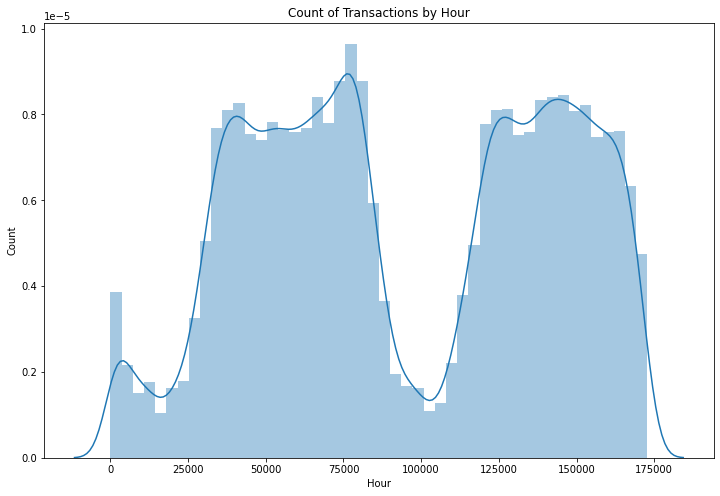

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.distplot(normal_df['Time'], bins=48)
plt.title('Count of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

## **Ploting Distplot for Fradulent data**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


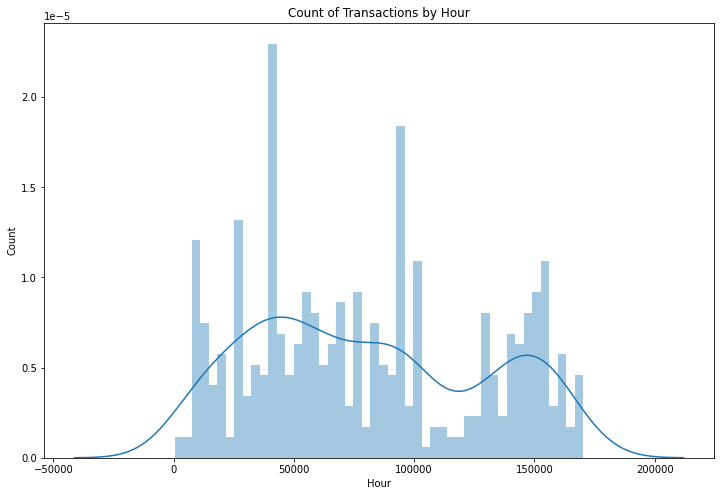

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.distplot(fraudulent_df['Time'], bins=48)
plt.title('Count of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

the number of transactions for genuine users take a hit during late night and early morning hours. It also makes sense since most people sleep during this. On the contrary, for fraudulent transactions, the number sees sharp spikes during late hours, and during the daytime, the count is significantly less.

# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As per the count per column, we have no null values. Also, feature selection is not the case for this use case. Anyway, you can try applying feature selection mechanisms to check if the results are optimised.

I have observed in our data 28 features are transformed versions of PCA but the Amount is the original one. And, while checking the minimum and maximum is in the amount — I found the difference is huge that can deviate our result.

## **5. Check Null Values In The Dataset**

In [173]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Observation:

We can see that all the features in the dataset are numerical features and there are no null values present in the dataset. So we will not have to perform null-value handling on this dataset.

In [174]:
min(data.Amount), max(data.Amount)

(0.0, 25691.16)

In this case, it is a good practice to scale this variable. We can use a standard scaler to make it fix.

In [175]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Understanding the Correlation Among the Features in the Data**

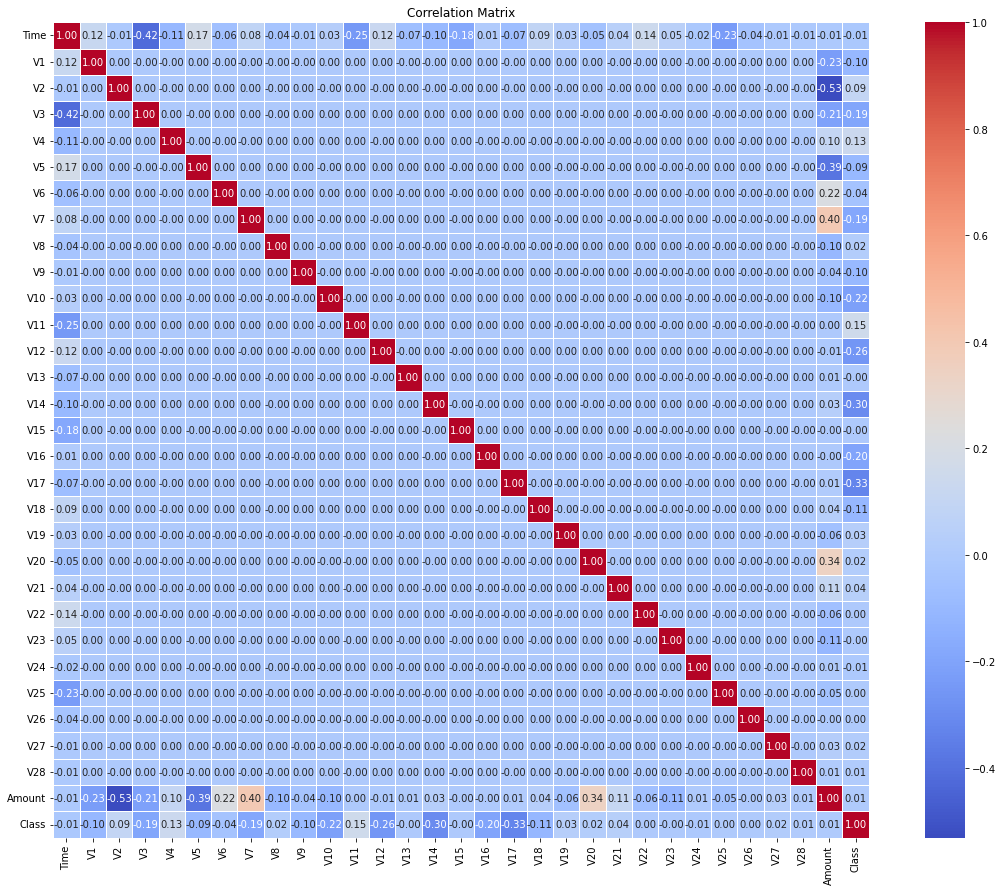

In [176]:
import matplotlib.pyplot as plt

corr = data.corr()

# plot correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Observations:**

Let us now look at the correlation among the features. From the plot below, you can conclude that the features are not showing any strong correlation relationship among themselves. So we do not have to remove any feature based on correlation analysis.

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [179]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [180]:
data = data.drop(['Time'],axis=1)

In [181]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [182]:
data.shape

(284807, 30)

In [183]:
data.duplicated().any()

True

In [184]:

data = data.drop_duplicates()

In [185]:
data.shape

(275663, 30)

6. Not Handling Imbalanced

In [186]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [187]:
import seaborn as sns

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

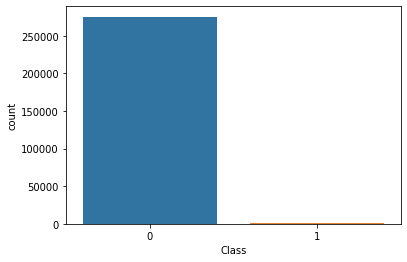

In [188]:
sns.countplot(data['Class'])

## **7. Store Feature Matrix In X And Response (Target) In Vector y**

Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y.

In [189]:
X = data.drop('Class',axis=1)
y = data['Class']

## **8. Splitting The Dataset Into The Training Set And Test Set**

Now, let split our train and test data.

In [190]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

That’s it. We now have two different data set — Train data we will be used for training our model and the data which is unseen will be used for testing.

# 9. Handling Imbalanced Dataset

In [191]:
# Undersampling
# Oversampling

# **Undersampling**

In the beginning, we saw that the data is highly imbalanced, so we will be using the undersampling technique to deal with it in this project. In undersampling, we reduce the data points of the majority class to balance it with the minority class. This helps in overcoming the imbalance class issue. There are various techniques using which we can undersample the majority class. We will be using the simplest one i.e. randomly selecting any data point.

In [192]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [193]:
normal.shape

(275190, 30)

In [194]:
fraud.shape

(473, 30)

In [195]:
normal_sample=normal.sample(n=473)

we are using the **sample** function from pandas library in Python.

**normal** is likely a pandas DataFrame or Series containing some data, and sample is a function that randomly samples a subset of rows from the DataFrame or Series. In this case, it samples **n=473** rows from the original normal DataFrame or Series and assigns it to a new variable called normal_sample.

In [196]:
normal_sample.shape

(473, 30)

In [197]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

We are using the concat function from pandas library in Python.

**normal_sample** and **fraud** are likely pandas DataFrames or Series containing some data. concat is a function that concatenates these two data frames or series together along a specified axis.

In this case, **pd.concat** concatenates normal_sample and fraud together along axis 0 (vertically) and assigns it to a new variable called **new_data**. The ignore_index=True parameter is used to ignore the index labels of the original data frames and create a new index for the concatenated data frame.

In [198]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [199]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.635738,0.428370,2.605388,1.482953,-0.132423,1.144833,0.020405,0.389188,0.584986,-0.043430,0.510276,0.861858,-1.024765,-0.682084,-1.943595,-1.507226,0.847049,-0.510120,1.597015,0.207440,-0.371705,-0.397180,-0.097218,-0.000316,-0.122160,-0.413465,0.268745,-0.047468,-0.306052,0
1,2.143051,0.443256,-2.256704,1.176542,1.272482,-0.672342,0.691044,-0.471000,1.214051,0.029269,-0.613506,-2.975154,1.044640,2.346519,-0.445981,-0.242737,0.059803,0.215648,-0.290806,-0.315903,-0.039455,0.196704,-0.101180,-0.035568,0.639103,-0.441930,-0.074298,-0.074896,-0.333239,0
2,0.176272,0.658282,-0.031694,-0.507444,0.777988,-0.368106,1.158208,-0.215195,0.033963,-0.888522,-0.957530,1.008465,1.353150,-0.258790,-0.934754,-0.714741,-0.292894,-0.643654,-0.041264,-0.027598,0.049217,0.334242,-0.040510,0.720599,0.043376,-0.401916,0.027258,0.007089,-0.181112,0
3,-1.129633,-0.597349,1.781465,-2.525992,0.599294,0.160724,0.020897,0.122531,-0.998812,0.095781,0.550724,-0.216312,0.352893,-0.704700,-0.925951,1.613240,-0.589590,-0.868804,0.439749,0.595266,-0.042540,-0.286701,-0.083079,0.185448,0.505805,-0.479377,0.057294,-0.098856,-0.093354,0
4,1.279067,0.574359,-0.465882,0.837862,0.022034,-1.421066,0.371794,-0.297144,-0.104430,-0.586455,0.051605,-0.269156,-0.412322,-0.943264,0.976291,0.474756,0.836059,0.182314,-0.321630,-0.100433,-0.142172,-0.371177,-0.074691,0.288823,0.558996,0.369874,-0.036340,0.035879,-0.350191,0


In [200]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

## Train & Test **Split**

In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [203]:
y_pred1 = log.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score

In [205]:
accuracy_score(y_test,y_pred1)

0.9526315789473684

Accuracy score is a common evaluation metric used in Machine Learning to measure the performance of a classification model. It represents the percentage of correctly classified instances out of the total number of instances.

**accuracy_score** function is used to calculate the accuracy score of a logistic regression model on a testing dataset. The y_test variable contains the true labels of the testing data, and y_pred variable contains the predicted labels by the model. The accuracy_score function takes these two variables as inputs and returns the accuracy score of the model.

In [206]:
from sklearn.metrics import precision_score,recall_score,f1_score

The ***precision_score, recall_score, and f1_score ***functions are all part of the scikit-learn library in Python and are used to evaluate the performance of a classification model.

**precision_score:** Calculates the precision of the model, which is the ratio of true positives to the sum of true positives and false positives. It measures how many of the positive predictions made by the model are actually correct.

**recall_score:** Calculates the recall of the model, which is the ratio of true positives to the sum of true positives and false negatives. It measures how many of the actual positive instances the model was able to correctly identify.

**f1_score:** Calculates the F1 score, which is the harmonic mean of precision and recall. It is a balanced measure that takes both precision and recall into account.

In [207]:
precision_score(y_test,y_pred1)

0.9894736842105263

**precision_score** is a metric used to evaluate the performance of a binary classification model. Specifically, it measures the fraction of true positives among the total number of positive predictions made by the model. In other words, it calculates the proportion of positive predictions that are actually correct.

**Precision** is important in situations where we want to minimize the number of false positives, which are instances where the model predicts a positive outcome when the actual outcome is negative. False positives can be costly or have negative consequences, such as in medical diagnosis or fraud detection. Therefore, a model with high precision is preferred in these scenarios.

The precision_score function from scikit-learn library in Python is used to calculate the precision of a classification model. It takes the true labels and predicted labels of the target variable as inputs, and returns the precision score.

In [208]:
recall_score(y_test,y_pred1)

0.9215686274509803

**recall**_score is a performance metric used in binary and multiclass classification tasks to measure the proportion of actual positive instances that are correctly identified by the model as positive.

In other words, ***recall_score *** measures the model's ability to correctly identify all positive instances in the dataset, and it is calculated as the ratio of true positives to the sum of true positives and false negatives.

A high recall score indicates that the model is effectively capturing all positive instances in the dataset, while a low recall score indicates that the model is missing some positive instances, which can be problematic in scenarios where it is important to avoid false negatives.

**recall_score** is one of several performance metrics used in machine learning to evaluate the effectiveness of a model, along with precision, accuracy, and F1 score, among others.

In [209]:
f1_score(y_test,y_pred1)

0.9543147208121827

**f1_score** is a commonly used performance metric in binary and multiclass classification tasks, which provides a balance between precision and recall. It is the harmonic mean of precision and recall, and it is calculated as follows:

**F1 Score = 2 * (precision * recall) / (precision + recall)**

where precision is the ratio of true positives to the sum of true positives and false positives, and recall is the ratio of true positives to the sum of true positives and false negatives.

The **f1_score metric** is used to evaluate the overall performance of a model, taking into account both precision and recall. It is particularly useful in situations where it is important to avoid both false positives and false negatives, as it provides a balanced view of the model's performance.

**In general, a high f1_score indicates that the model is performing well in terms of both precision and recall, while a low f1_score suggests that the model needs improvement.**

**Importing Confusion metrix**

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1, labels = [0, 1])

array([[87,  1],
       [ 8, 94]])

# 11. Decision Tree Classifier

In [211]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [212]:
y_pred2 = dt.predict(X_test)

In [213]:
accuracy_score(y_test,y_pred2)

0.8894736842105263

In [214]:
precision_score(y_test,y_pred2)

0.9175257731958762

In [215]:
recall_score(y_test,y_pred2)

0.8725490196078431

In [216]:
f1_score(y_test,y_pred2)

0.8944723618090452

In [217]:
confusion_matrix(y_test,y_pred2, labels = [0, 1])

array([[80,  8],
       [13, 89]])

Here, the first row represents positive and the second row represents negative. So, we have 54947 as true positive and 126 are false positive. That says, out of 54947+126=55073, we have 55073 that are successfully classified as a normal transaction and 126 were falsely classified as normal — but they were fraudulent.

**A confusion matrix** is a table that is often used to evaluate the performance of a machine learning model in a binary or multiclass classification task. It summarizes the number of correct and incorrect predictions made by the model on a set of test data for each class.

**A confusion matrix** consists of four parts: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). The matrix is arranged in a table where rows represent the actual class labels and columns represent the predicted class labels. The diagonal of the matrix shows the number of correct predictions (i.e., true positives and true negatives), while the off-diagonal elements show the number of incorrect predictions (i.e., false positives and false negatives).

Here's an example of a binary classification confusion matrix:


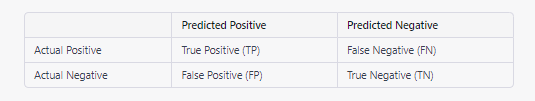

Predicted Positive	Predicted Negative
Actual Positive	True Positive (TP)	False Negative (FN)
Actual Negative	False Positive (FP)	True Negative (TN)
In this example, TP represents the number of true positives, FN represents the number of false negatives, FP represents the number of false positives, and TN represents the number of true negatives.

A confusion matrix is a useful tool for evaluating the performance of a classification model, as it provides a clear breakdown of the model's predictions and can be used to calculate a variety of performance metrics such as precision, recall, and F1 score.

# 12. Random Forest Classifier

In [218]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [219]:
y_pred3 = rf.predict(X_test)

In [220]:
accuracy_score(y_test,y_pred3)

0.9421052631578948

In [221]:
precision_score(y_test,y_pred3)

0.989247311827957

In [222]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [223]:
f1_score(y_test,y_pred3)

0.9435897435897437

In [224]:
confusion_matrix(y_test,y_pred3, labels = [0, 1])

array([[87,  1],
       [10, 92]])

# XG Boost Classifier


In [225]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [226]:
y_pred4 = xgb.predict(X_test)

In [227]:
accuracy_score(y_test,y_pred4)

0.9473684210526315

In [228]:
precision_score(y_test,y_pred4)

0.9693877551020408

In [229]:
recall_score(y_test,y_pred4)

0.9313725490196079

In [230]:
f1_score(y_test,y_pred4)

0.95

In [231]:
confusion_matrix(y_test,y_pred4, labels = [0, 1])

array([[85,  3],
       [ 7, 95]])

In [232]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','xgb'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100
                    ]})

In [233]:
final_data

,Models,ACC
0,LR,95.263158
1,DT,88.947368
2,RF,94.210526
3,xgb,94.736842


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

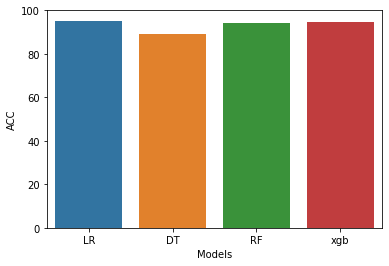

In [234]:
sns.barplot(final_data['Models'],final_data['ACC'])

**Conclusion**

Well, congratulation!! We just received 99.99% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.

Finally, based on our accuracy score — Random Forest Classifier is the winner for our case. The only catch here is the data that we have received for model training. The data features are the transformed version of PCA. If the actual features follow a similar pattern then we are doing great!!




# Oversampling

Oversampling is a technique used in machine learning to address the issue of class imbalance, where one class in a binary classification problem has significantly fewer samples than the other class. In such cases, the classifier can become biased towards the majority class and have poor performance on the minority class.

Oversampling involves increasing the number of samples in the minority class to balance the class distribution. There are several methods for oversampling, including:

**Random Oversampling:** This involves randomly duplicating samples from the minority class until it is the same size as the majority class.

**SMOTE (Synthetic Minority Over-sampling Technique): **This is a more advanced method that creates synthetic samples in the minority class by interpolating between existing samples.

**ADASYN (Adaptive Synthetic Sampling):** This method also creates synthetic samples, but focuses on generating samples in regions of the feature space where the class distribution is sparse.

In [235]:
X = data.drop('Class',axis=1)
y = data['Class']

In [236]:
X.shape

(275663, 29)

In [237]:
y.shape

(275663,)

In [238]:
from imblearn.over_sampling import SMOTE

**SMOTE** stands for **Synthetic Minority Over-sampling Technique**. It is a technique used in machine learning and data mining to address the problem of class imbalance. Class **imbalance** refers to a situation where the number of instances belonging to one class is significantly smaller than the number of instances belonging to another class in a classification problem.

SMOTE is used to artificially increase the number of instances of the minority class by creating synthetic data points. The synthetic data points are generated by taking the difference between feature vectors of two instances from the minority class and multiplying it by a random number between 0 and 1. The synthetic data points are then added to the dataset, making the minority class more represented in the data.

SMOTE is a popular technique in classification problems where the minority class is important, such as in fraud detection, disease diagnosis, and anomaly detection. It has been shown to improve the performance of classifiers in such scenarios. However, it is important to note that SMOTE should be used with caution and should be validated with appropriate evaluation metrics to ensure that it does not introduce bias or overfitting in the model.

In [239]:
X_res,y_res = SMOTE().fit_resample(X,y)

The code snippet X_res, y_res = SMOTE().fit_resample(X, y) applies the SMOTE algorithm to the input data X and y, and returns the oversampled dataset in X_res and y_res.

Here's a breakdown of what each part of the code does:

**SMOTE() **creates an instance of the SMOTE class with default parameters. The SMOTE class is implemented in the imblearn package, which is a Python library for dealing with imbalanced datasets.

**fit_resample(X, y)** is a method of the SMOTE class that applies the SMOTE algorithm to the input data X and y. It first identifies the minority class in y, which is the class with fewer instances. Then, it generates synthetic samples for the minority class to balance the number of samples between the minority and majority classes. The fit_resample method returns the oversampled data in the form of two arrays, X_res and y_res.

**X_res** is a new dataset that contains the oversampled feature vectors of the input data X. X_res has the same number of columns as X, but a greater number of rows due to the synthetic samples generated by SMOTE.

y_res is a new array that contains the corresponding labels for the oversampled data in X_res. y_res has the same length as X_res, and the label distribution is balanced between the minority and majority classes.

The resulting oversampled dataset X_res and y_res can be used to train a classifier or perform any other analysis on the balanced dataset.

In [240]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)


# 10. Logistic Regression

In [242]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [243]:
y_pred1 = log.predict(X_test)

In [244]:
accuracy_score(y_test,y_pred1)

0.9449652967040953

In [245]:
precision_score(y_test,y_pred1)

0.9732735113809975

In [246]:
recall_score(y_test,y_pred1)

0.9149864552842573

In [247]:
f1_score(y_test,y_pred1)

0.9432303770897369

In [248]:
confusion_matrix(y_test,y_pred1, labels = [0, 1])

array([[53691,  1382],
       [ 4676, 50327]])

## **11. Decision Tree Classifier**

In [249]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [250]:
y_pred2 = dt.predict(X_test)

In [251]:
accuracy_score(y_test,y_pred2)

0.997974126966823

In [252]:
precision_score(y_test,y_pred2)

0.9970420643850034

In [253]:
recall_score(y_test,y_pred2)

0.9989091504099776

In [254]:
f1_score(y_test,y_pred2)

0.9979747341270921

In [255]:
confusion_matrix(y_test,y_pred2, labels = [0, 1])

array([[54910,   163],
       [   60, 54943]])

## **12. Random Forest Classifier**

In [256]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [257]:
y_pred3 = rf.predict(X_test)

In [258]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [259]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [260]:
recall_score(y_test,y_pred3)

1.0

In [261]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [262]:
confusion_matrix(y_test,y_pred3, labels = [0, 1])

array([[55064,     9],
       [    0, 55003]])

# XG Boost Classifier

In [263]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [264]:
y_pred4 = xgb.predict(X_test)


In [265]:
accuracy_score(y_test,y_pred4)

0.9989552672698863

In [266]:
precision_score(y_test,y_pred4)

0.9980400696864111

In [267]:
recall_score(y_test,y_pred4)

0.9998727342144974

In [268]:
f1_score(y_test,y_pred4)

0.9989555614084482

In [269]:
confusion_matrix(y_test,y_pred4, labels = [0, 1])

array([[54965,   108],
       [    7, 54996]])

In [270]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','xgb'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100
                    ]})

In [271]:

final_data

,Models,ACC
0,LR,94.496530
1,DT,99.797413
2,RF,99.991824
3,xgb,99.895527


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

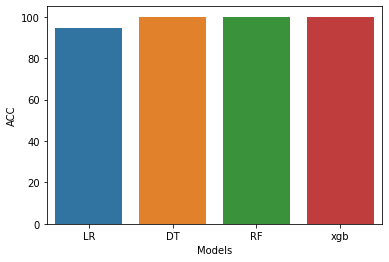

In [272]:
sns.barplot(final_data['Models'],final_data['ACC'])

**Conclusion**

Well, congratulation!! We just received 99.99% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.

Finally, based on our accuracy score — Random Forest Classifier is the winner for our case. The only catch here is the data that we have received for model training. The data features are the transformed version of PCA. If the actual features follow a similar pattern then we are doing great!!




## **Save The Model**

In [273]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [274]:
import joblib

In [275]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [276]:
model = joblib.load("credit_card_model")

In [277]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [278]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
